# idea

## women are in better physical conditions than men as they get older. So there are more female riders age greater than 50. 

# Null Hypothesis 

## the ratio of women riders whose age is over 60 is not significantly higher than the ratio of men riders whose age is over age 60. 

# _$H_0$_ : $\frac{W_{\mathrm{over 50}}}{W} - \frac{M_{\mathrm{over 50}}}{M} <= 0 $
# _$H_1$_ : $\frac{W_{\mathrm{over 50}}}{W} - \frac{M_{\mathrm{over 50}}}{M} > 0$

## the significance level for this test is $\\alpha=0.05$

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


'/home/cusp/td928/PUIdata'

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
datestring_6 = '201606'
getCitiBikeCSV(datestring_6)
datestring_12 = '201612'
getCitiBikeCSV(datestring_12)

file in place, you can continue
file in place, you can continue


In [5]:
df_6 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_6 + '-citibike-tripdata.csv')
df_6.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [6]:
df_12 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring_12 + '-citibike-tripdata.csv')
df_12.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1


In [7]:
df = pd.DataFrame()

In [10]:
# rename the columns to make sure the 
df_6.rename(columns={'birth year' : 'birth_year'}, inplace=True)
df_12.rename(columns={'Gender':'gender', 'Birth Year':'birth_year'},inplace=True)

In [11]:
df = df_6[['gender', 'birth_year']].append(df_12[['gender', 'birth_year']], ignore_index=True)

In [12]:
# checking the dataframe size and its entries

df

,gender,birth_year
0,1,1972.0
1,1,1967.0
2,1,1989.0
3,1,1991.0
4,1,1989.0
5,1,1974.0
6,1,1986.0
7,1,1986.0
8,1,1968.0
9,2,1971.0


In [13]:
# drop all the NaN entries in the dataframe and check the new number of entries in dataframe
df.dropna(axis=0, how='any', inplace=True)
df.shape

(2037600, 2)

## Part 2: The Exploratory Analysis

In [14]:
# compute the year that the people would be over age 50

current_year = 2017
age_50 = 2017 - 50
age_50

1967

In [16]:
# get the number of riders age over 50 for each gender and gender total for normalization later

counts_w_over50 = len(df[(df.birth_year < age_50) & (df.gender == 2)])
counts_m_over50 = len(df[(df.birth_year < age_50) & (df.gender == 1)])

norm_w = len(df.gender == 2)
norm_m = len(df.gender == 1)

print('The total number of women over fifty in sample: %d' % counts_w_over50) 
print('The total number of men over fifty in sample: %d' % counts_m_over50)

The total number of women over fifty in sample: 89327
The total number of men over fifty in sample: 311618


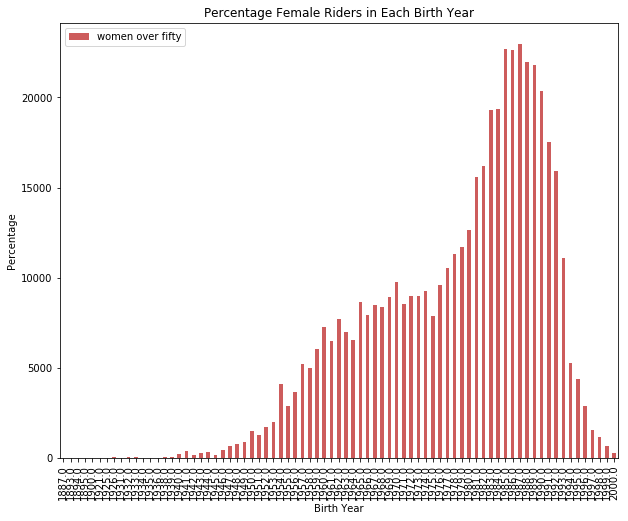

In [69]:
# plot the unnormalized riders over age fifty for each gender by their birth year

fig = pl.figure(figsize=(10,8))

ax_1 = (df['birth_year'][df.gender == 2].groupby(df.birth_year).count()).plot(kind='bar',\
                                                                                        color = 'IndianRed',\
                                                                                        label='women over fifty')
ax_1.set_title('Percentage Female Riders in Each Birth Year')
ax_1.set_xlabel('Birth Year')
ax_1.set_ylabel('Percentage')

pl.legend()


_*Figure 1*_ Unormalized all females riders from dataset accumulated by their birth year. Notice the shape of the distribution is almost unimodal with most of the riders born around 1990s which follows common sense that most riders are young. 

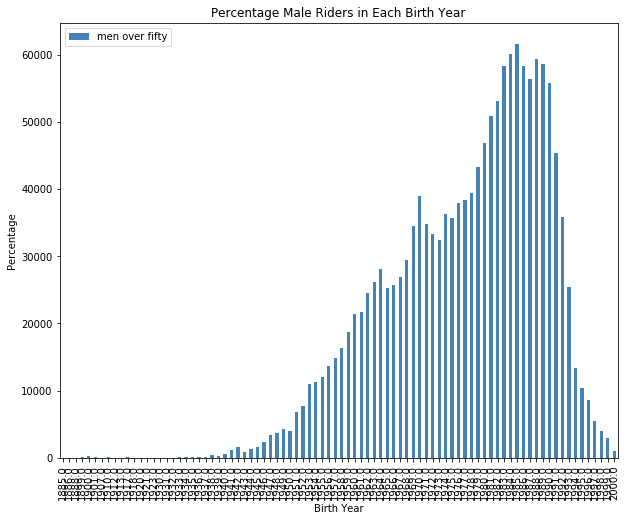

In [70]:
# plotting male riders

fig = pl.figure(figsize=(10,8))

ax_2 = (df['birth_year'][df.gender == 1].groupby(df.birth_year).count()).plot(kind='bar',\
                                                                                      color = 'SteelBlue',label='men over fifty')


ax_2.set_title('Percentage Male Riders in Each Birth Year')
ax_2.set_xlabel('Birth Year')
ax_2.set_ylabel('Percentage')

pl.legend()

_*Figure 2*_  The unnormalized men by their birth year. The distribution is very similar to the female population. But it has its unimodal peak at around 1985 instead 1990. Also, notice some of the birth year does not have both female and male samples.

## both distributions has some outliers and the overall distribution shows that for year before 1930s the data is almost trivial and also a lot of them is missing entries. So I decide to trim the dataset from 1930s and also remove 1937 because in the female samples no riders are born in that birth year. 

In [22]:
# removing data for birth year before 1930 and also the year which does not have data for 
# both female and male riders

df_tem = df[(df.birth_year < age_50)]

# birth year later than 1931
df_tem = df_tem[(df_tem.birth_year > 1930)]

# eliminate the year 
df_re = df_tem[(df_tem.birth_year != 1937)]

df_re.reset_index(drop=True, inplace=True)

df_re

,gender,birth_year
0,1,1964.0
1,1,1952.0
2,1,1952.0
3,1,1961.0
4,1,1963.0
5,1,1951.0
6,1,1952.0
7,1,1956.0
8,1,1960.0
9,1,1963.0


count    35.000000
mean      0.001251
std       0.001446
min       0.000003
25%       0.000072
50%       0.000435
75%       0.002507
max       0.004241
Name: birth_year, dtype: float64

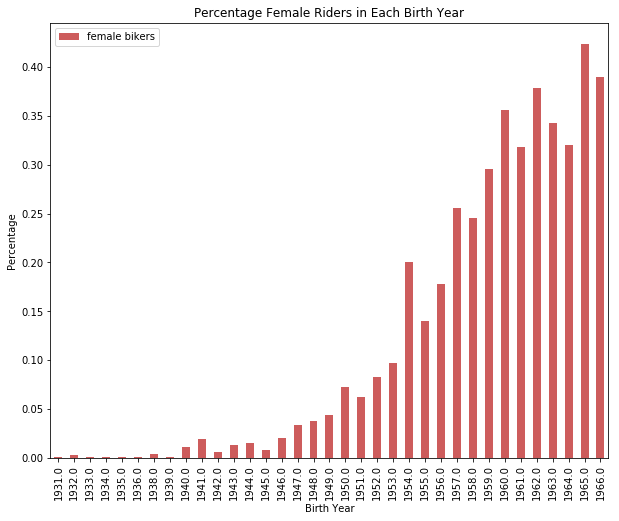

In [65]:
# calcuating the counts of female riders in each birth year and error bar for aggregate

count_w = df_re['birth_year'][df_re.gender == 2].groupby(df_re.birth_year).count()

error_w = np.sqrt(count_w)

fig = pl.figure(figsize(10,8))

ax_3 = (count_w / norm_w * 100).plot(kind='bar',\
                               yerr=[((error_w) / norm_w, (error_w) / norm_w)],\
                               color = 'IndianRed',\
                               label='female bikers')
                            

ax_3.set_title('Percentage Female Riders in Each Birth Year')    
ax_3.set_xlabel('Birth Year')
ax_3.set_ylabel('Percentage')
pl.legend()

(count_w / norm_w).describe()

_*Figure 3*_ Female bikers histogram by their birth year. Notice the max for female bikes is around 0.004. So the birth year(before 1966) with most riders are only less than one percent of the overall female riders population. 

count    35.000000
mean      0.004358
std       0.004713
min       0.000002
25%       0.000346
50%       0.001969
75%       0.007629
max       0.013816
Name: birth_year, dtype: float64

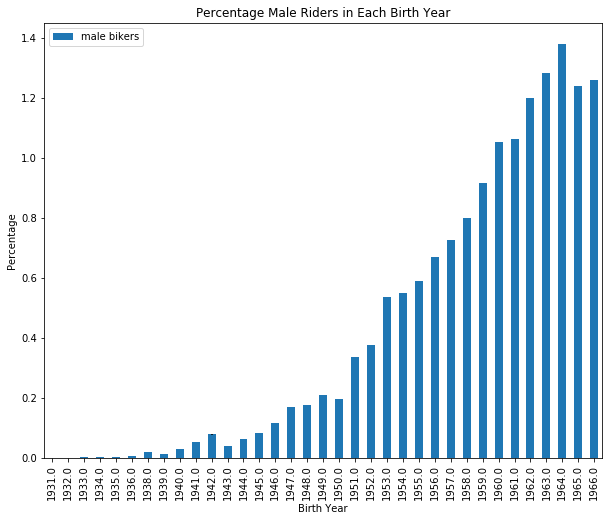

In [66]:
count_m = df_re['birth_year'][df_re.gender == 1].groupby(df_re.birth_year).count()

error_m = np.sqrt(count_m)

fig = pl.figure(figsize(10,8))

ax_4 = (count_m / norm_m * 100).plot(kind='bar',\
                               yerr=[((error_m) / norm_m, (error_m) / norm_m)],\
                               label='male bikers')

ax_4.set_title('Percentage Male Riders in Each Birth Year')
ax_4.set_xlabel('Birth Year')
ax_4.set_ylabel('Percentage')
pl.legend()

(count_m / norm_m).describe()

_*Figure 4*_ Male bikers histogram by their birth year. Notice a lot more male riders are born (before 1966). 

In [72]:
# this is the proportion of over fifty female riders 
p0 = count_w.sum() / norm_w

p1 = count_m.sum() / norm_m

print('The percentage of female riders age over fifty is {:.2f}%'.format(p0 * 100))
print('The percentage of male riders age over fifty is {:.2f}%'.format(p1 * 100))

The percentage of female riders age over fifty is 4.38%
The percentage of male riders age over fifty is 15.25%


# our alternative hypothesis is that more female rider over age fifty ride than male riders. But now female riders percentage is less than male riders. So I cannot use hypothesis testing to verify the significance of the results. 

In [67]:
# following function is implemented but was not run for this study. Since the proportion
# for women is already less than the men's proportion of older riders.

def calculateP(p0, p1, n0, n1):
    return (p0 * n0 + p1 * n1) / (n0 + n1)

def calculateSE(p, n0, n1):
    return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))

def zscore(p0, p1, s):
    return (p0 - p1) / s


# the calculation section is commented out to 

# sp_stdev_mw = calculateSE(calculateP(count_w.sum(), count_m.sum(), norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)

# z = zscore(count_w.sum(), count_m.sum(), sp_stdev_mw)
# print ("The z statistics is %.2f"%z)

# Discussion:

## Weakness of thie Analysis:

1. One of the possible weakness of this analysis might be the mismatch between the sample sizes of female and male where the male has more than . But with over 80,000 female samples and much larger male sample sizes with 300,000 male. Yet the female total seems large enough for the analysis still be relevant.

2. Even igonoring the relative size between the two sample size. The male riders age over fifty is about 15% of the overall male riders population in my dataset while the female riders age over fifty has only 4% of the overall population. 

3.  This choice to study age over fifty is totally arbirary and is not supported by any outside research e.g. medical study on the difference in phyisical declines for male and female.  

4. Citibikes might not be representative enough of the whole female and male population. It might not even be a representative for bikers. Maybe female riders are more concerned about the safety of using citibike therefore avoiding using citibike overall.